In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [6]:
class_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
def show_image(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(class_labels[y[index]])

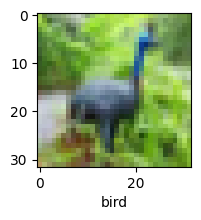

In [8]:
show_image(x_train,y_train,6)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
model = keras.Sequential([
    #CNN layers
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='valid', strides=(1,1), input_shape = (32,32,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='valid', strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #ANN layers
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs = 11)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.4250 - loss: 1.5976
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6413 - loss: 1.0147
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7121 - loss: 0.8346
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7570 - loss: 0.6956
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8053 - loss: 0.5597
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8441 - loss: 0.4499
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8816 - loss: 0.3466
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9130 - loss: 0.2552
Epoch 9/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9346 - loss: 0.1962
Epoch 10/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9519 - loss: 0.1406
Epoch 11/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.9639 - loss: 0.1075


In [12]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6975 - loss: 1.5935


[1.6165927648544312, 0.6933000087738037]

In [13]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[9.06272923e-09, 2.39498263e-07, 3.91605637e-10, ...,
        3.30369829e-11, 2.40276586e-05, 4.44218190e-10],
       [7.47343229e-11, 2.37440105e-07, 3.67409663e-23, ...,
        2.25056218e-30, 9.99999762e-01, 5.05260193e-15],
       [6.09536134e-02, 6.11242615e-02, 1.91517202e-08, ...,
        3.42020849e-06, 8.19041491e-01, 5.75222410e-02],
       ...,
       [4.35427858e-14, 2.05725092e-14, 4.23507032e-07, ...,
        1.86509780e-07, 1.21001325e-11, 1.88416685e-14],
       [3.53744224e-04, 1.88297685e-03, 3.30882494e-06, ...,
        5.22861058e-07, 2.06647865e-10, 1.34563000e-10],
       [9.80861440e-17, 2.20244117e-18, 2.70931042e-12, ...,
        9.99971151e-01, 8.39382281e-16, 4.96914743e-19]], dtype=float32)

In [14]:
y_pred_class = np.array([np.argmax(i) for i in y_pred])

In [15]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [16]:
y_pred_class

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      1000
           1       0.82      0.80      0.81      1000
           2       0.62      0.56      0.59      1000
           3       0.47      0.53      0.49      1000
           4       0.67      0.63      0.65      1000
           5       0.55      0.69      0.61      1000
           6       0.88      0.63      0.74      1000
           7       0.78      0.74      0.76      1000
           8       0.82      0.81      0.81      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000



In [19]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[798,  16,  39,  23,  17,  15,   3,   9,  56,  24],
       [ 39, 803,  11,  15,   9,  10,   6,   0,  30,  77],
       [ 93,   5, 565,  86,  84,  82,  24,  35,  15,  11],
       [ 32,  10,  68, 525,  47, 232,  23,  30,  13,  20],
       [ 40,   5,  75, 102, 627,  63,  18,  55,  10,   5],
       [ 25,   5,  46, 139,  34, 687,   3,  41,  13,   7],
       [ 23,  11,  48, 142,  48,  70, 630,  10,   8,  10],
       [ 29,   7,  30,  54,  59,  62,   3, 738,   3,  15],
       [ 82,  30,  14,  17,   9,  12,   2,   7, 805,  22],
       [ 56,  82,  11,  22,   5,  14,   2,  25,  28, 755]], dtype=int64)